# Exercise Twelve: Texts, Three Ways
## For this week, you will sample the three methods we've explored (topic modeling, sentiment analysis, and Markov chain generation) using the same set of root texts.

1. Collect and import ten documents (novels work best, but anything goes!)
2. Using the topic modeling code as a starter, build a topic model of the documents
3. Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare
4.  Using the Markov chain code as a starter, generate a sentence using one of the documents
5.  Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

# Topic Modeling 

In [35]:
#Collect and import ten documents
#I tried to segment this off so it was not pulling such a long part of the destination, but I got errors every other way I sliced it.

import pandas as pd
import os
import numpy as np

documents = []
path = '/Users/smargar/design/exercises/text2'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) # count files in corpus
print(filenames[:10]) # print names of 1st ten files in corpus

10
['/Users/smargar/design/exercises/text2/Aenied_The.txt', '/Users/smargar/design/exercises/text2/Full_text_of_The_Nibelungenlied.txt', '/Users/smargar/design/exercises/text2/Odyssey.txt', '/Users/smargar/design/exercises/text2/Provided_by _he_Internet_Classics_Archive.txt', '/Users/smargar/design/exercises/text2/The_Project_Gutenberg_eBook_of_The_Divine_Comedy.txt', '/Users/smargar/design/exercises/text2/The_Rime_of_the_Ancient_Mariner.txt', '/Users/smargar/design/exercises/text2/The_Waste_Land.txt', '/Users/smargar/design/exercises/text2/beowulf_translation_by_seamus_heaney.txt', '/Users/smargar/design/exercises/text2/paradiselost.txt', '/Users/smargar/design/exercises/text2/paradiseregaind.txt']


In [36]:

import sklearn.feature_extraction.text as text

In [37]:
vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1.0)


In [38]:
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

In [39]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (10, 134). Number of tokens 53986


In [40]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)

In [41]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

               age       air      arms    beauty     black     blood  \
Topic 0   0.238272  0.195301  0.194871  0.183969  0.240518  0.189597   
Topic 1   0.226442  0.264472  0.235988  0.253000  0.291793  0.274580   
Topic 2   0.208739  0.260700  0.267743  0.259466  0.228123  0.295756   
Topic 3   0.211693  0.228524  0.235670  0.222739  0.201973  0.197491   
Topic 4   0.213674  0.189961  0.191986  0.164910  0.159886  0.199587   
...            ...       ...       ...       ...       ...       ...   
Topic 95  0.186651  0.235412  0.190757  0.207041  0.216921  0.211000   
Topic 96  0.187347  0.234996  0.242127  0.186727  0.218681  0.195859   
Topic 97  0.207121  0.202852  0.215175  0.168324  0.208070  0.230465   
Topic 98  0.153746  0.214430  0.190634  0.212186  0.190087  0.203023   
Topic 99  0.184854  0.281400  0.274021  0.223006  0.209902  0.224186   

            bright     bring      came      cast  ...    waters       way  \
Topic 0   0.236112  0.167155  0.229361  0.183612  ...  0.2

In [42]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)

did      0.845389
shall    0.630173
said     0.618377
hand     0.516024
good     0.505329
man      0.505081
come     0.498875
far      0.485044
son      0.477446
like     0.471997
men      0.443968
know     0.422292
high     0.422084
came     0.409862
went     0.397048
stood    0.393809
time     0.392444
way      0.392370
Name: Topic 9, dtype: float64

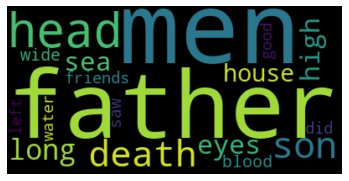

In [44]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [45]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/smargar/nltk_data...
[nltk_data] Downloading package punkt to /Users/smargar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
for filename in filenames:
    with open(filename, encoding="utf-8") as f:
        text = f.read()
        documents.append(text)
        scores = sid.polarity_scores(text[0:500])
    print(filename)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    print(' ')

/Users/smargar/design/exercises/text2/Aenied_The.txt
compound: 0.3612, neg: 0.0, neu: 0.955, pos: 0.045,  
/Users/smargar/design/exercises/text2/Full_text_of_The_Nibelungenlied.txt
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,  
/Users/smargar/design/exercises/text2/Odyssey.txt
compound: 0.5622, neg: 0.0, neu: 0.92, pos: 0.08,  
/Users/smargar/design/exercises/text2/Provided_by _he_Internet_Classics_Archive.txt
compound: 0.5106, neg: 0.063, neu: 0.818, pos: 0.119,  
/Users/smargar/design/exercises/text2/The_Project_Gutenberg_eBook_of_The_Divine_Comedy.txt
compound: 0.8074, neg: 0.049, neu: 0.821, pos: 0.13,  
/Users/smargar/design/exercises/text2/The_Rime_of_the_Ancient_Mariner.txt
compound: 0.5106, neg: 0.023, neu: 0.926, pos: 0.051,  
/Users/smargar/design/exercises/text2/The_Waste_Land.txt
compound: -0.4215, neg: 0.286, neu: 0.714, pos: 0.0,  
/Users/smargar/design/exercises/text2/beowulf_translation_by_seamus_heaney.txt
compound: 0.3182, neg: 0.074, neu: 0.825, pos: 0.101,  
/Users/

# Generation

In [48]:
import markovify
import random
generator_text = ""

for document in documents:
    generator_text += document

In [49]:
text_model = markovify.Text(generator_text)
print( text_model.make_sentence() )

\r\rAs a fire raging in some great lion\xc3\x95s lair in the hall.


In [50]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"

print(novel)

Then the lovely goddess replied swiftly: \xc3\x92Odysseus, man of you will hear of.\xc3\x95\n\t\t\xc3\x94No, Eurymachus,\xc3\x95 Antinous, Eupeithes\xc3\x95 son, called her to stop her sad weeping, her tearful grieving, till she has found a path before them. 497 \r\rto Dido of the Danaans poured after them like flames of the second class belong Dietrich of Bern, \rUnto Bloedel straightway did repair \rWhere Dankwart sat at table. \rBearing thus fair greeting thence full quickly girded on. Yet loath to take back this grace from thee far, \rThat far be from some expansion of the Mariandynians.\n\tBk III:356-403 Athene departs, and Nestor prays to Athene\n\t\t\n\tSo saying she first of those, of whom they before had noticed.\r\rThither we drew; and there along that bank which lowest lies,\r From him thou\xc3\x95lt know his mood so haughty, naught he\'ll deny of all. 

Never once have my own brave and of the ships sailed swiftly, for a brave man and left the side free from his chariot and 